The dataset used for this lab was obtained from:

Manu Siddhartha, November 6, 2020, "Bondora Peer-to-Peer Lending Data", IEEE Dataport, doi: https://dx.doi.org/10.21227/33kz-0s65. 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
pd.set_option('display.max_columns', 500)

#### 1. Load, Understand the Data and Split the Data

In [5]:
# Load data
data = pd.read_csv('../data/loan_data.csv', low_memory=False)
data.head()

,new_customer,income_verification,language,age,gender,country,amount,loan_duration,use_of_loan,education,marital_status,nr_dependants,employment_status,employment_duration,work_experience,occupation,home_ownership,income,existing_debt,total_debt,debt_to_income,disposable_income,credit_score_microL,credit_score_equifax,credit_score_ee_mini,nr_previous_loans,amount_previous_loans,previous_repayments,previous_early_repayments,previous_early_repayments_count,default,credit_score_fi_asiakas_c,credit_score_fi_asiakas_n
0,0,expenses_verified,estonian,23,male,EE,5500.0,60,loan_consolidation,secondary,single,0.0,fully,UpTo1Year,2To5Years,transport,tenant_unfurnished,650.0,6,718.99,52.06,61.58,NaN,NaN,1000.0,1,3000.0,571.73,0.0,0,0,NaN,NaN
1,0,expenses_verified,russian,25,male,EE,1200.0,60,other,vocational,single,0.0,fully,UpTo1Year,5To10Years,transport,living_with_parents,445.0,4,386.77,24.70,85.10,NaN,NaN,1000.0,1,500.0,194.98,0.0,0,0,NaN,NaN
2,1,unverified,estonian,22,female,EE,1000.0,60,other,basic,cohabitant,1.0,entrepreneur,UpTo1Year,LessThan2Years,catering,living_with_parents,1117.0,1,335.00,6.02,714.75,NaN,NaN,700.0,0,0.0,0.00,0.0,0,1,NaN,NaN
3,1,unverified,finnish,49,female,FI,1000.0,60,other,basic,married,1.0,fully,MoreThan5Years,15To25Years,healthcare,tenant_unfurnished,1472.0,4,803.00,22.65,638.60,NaN,NaN,NaN,0,0.0,0.00,0.0,0,0,RL2,NaN
4,0,expenses_verified,estonian,25,female,EE,4100.0,60,loan_consolidation,secondary,cohabitant,1.0,fully,UpTo4Years,5To10Years,other,living_with_parents,503.0,4,520.49,36.23,70.74,NaN,NaN,1000.0,1,1500.0,1309.03,0.0,0,0,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75693 entries, 0 to 75692
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   new_customer                     75693 non-null  int64  
 1   income_verification              75693 non-null  object 
 2   language                         75693 non-null  object 
 3   age                              75693 non-null  int64  
 4   gender                           75693 non-null  object 
 5   country                          75693 non-null  object 
 6   amount                           75693 non-null  float64
 7   loan_duration                    75693 non-null  int64  
 8   use_of_loan                      75693 non-null  object 
 9   education                        75693 non-null  object 
 10  marital_status                   75693 non-null  object 
 11  nr_dependants                    30677 non-null  float64
 12  employment_status 

In [7]:
data.shape

(75693, 33)

### 2. Split the Data

#### split the dataset to 70% to 30% first

Split data
Let's divide the dataset into 3 subsets:

- A training set
- An evaluation set
- A hold-out sample
There are various ways to achieve this. I use sklearn.

In [8]:
y = data['default']
X = data.drop(['default'],axis=1)

In [9]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


I have used a simple train test split function from scikit-learn lib

- Split the test set from the above step into two test sets containing 50% of the remaining customers each and inspect the shape:

In [10]:
X_eval, X_holdout, y_eval, y_holdout = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Print the shapes of each set
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set 1 shape:", X_holdout.shape, y_holdout.shape)
print("Test set 2 shape:", X_eval.shape, y_eval.shape)

Train set shape: (52985, 32) (52985,)
Test set 1 shape: (11354, 32) (11354,)
Test set 2 shape: (11354, 32) (11354,)


- Finally, calculate the default rate in each data set:

In [11]:
y_train.mean(), y_eval.mean(), y_holdout.mean()

(0.5574596583938851, 0.555398978333627, 0.5543420820856086)

The default rate is about 55%. As the data sets were generated by random splits, you get similar a default rate in each data set.

#### Note: 
- We have 3 datasets with randomly allocated customers. 
- The train set contains 70% of the customers, and the two remaining test sets contain 15% of the customers each. 
- The default rate in the data sets is ~55%.

Now we will look in to the data types and apply some techniques to make them confortable for our model lighGBM, it uses numerical datas.

- Find the categorical variables in the data

In [12]:
cols_cat = list(X_train.select_dtypes(include="O").columns)
cols_cat

['income_verification',
 'language',
 'gender',
 'country',
 'use_of_loan',
 'education',
 'marital_status',
 'employment_status',
 'employment_duration',
 'work_experience',
 'occupation',
 'home_ownership',
 'credit_score_microL',
 'credit_score_equifax',
 'credit_score_fi_asiakas_c']

In [13]:
X_train[cols_cat].head()

,income_verification,language,gender,country,use_of_loan,education,marital_status,employment_status,employment_duration,work_experience,occupation,home_ownership,credit_score_microL,credit_score_equifax,credit_score_fi_asiakas_c
3673,verified,finnish,male,FI,loan_consolidation,vocational,single,fully,UpTo2Years,MoreThan25Years,healthcare,tenant_furnished,NaN,NaN,RL1
56506,expenses_verified,finnish,male,FI,unknown,vocational,unknown,not_specified,MoreThan5Years,NaN,unknown,tenant_furnished,M,NaN,NaN
42957,unverified,estonian,male,EE,unknown,higher,unknown,not_specified,MoreThan5Years,NaN,unknown,owner_with_encumbrance,M,NaN,NaN
25747,expenses_verified,finnish,male,FI,unknown,secondary,unknown,not_specified,MoreThan5Years,NaN,unknown,mortgage,M,NaN,NaN
68381,expenses_verified,spanish,unknown,ES,unknown,secondary,unknown,not_specified,UpTo1Year,NaN,unknown,tenant_furnished,M,NaN,NaN


#### 3. Encode catagorical variables

In [14]:
# Import the OrdinalEncoder from scikit-learn
from sklearn.preprocessing import OrdinalEncoder

In [15]:
enc = OrdinalEncoder()

In [16]:
enc.fit(X_train[cols_cat])

OrdinalEncoder()

In [17]:
enc.categories_

[array(['expenses_verified', 'unverified', 'unverified_by_phone',
        'verified'], dtype=object),
 array(['english', 'estonian', 'finnish', 'other', 'russian', 'spanish'],
       dtype=object),
 array(['female', 'male', 'unknown'], dtype=object),
 array(['EE', 'ES', 'FI', 'SK'], dtype=object),
 array(['business', 'education', 'health', 'home_improvement',
        'loan_consolidation', 'other', 'real_estate', 'travel', 'unknown',
        'vehicle'], dtype=object),
 array(['basic', 'higher', 'primary', 'secondary', 'vocational'],
       dtype=object),
 array(['cohabitant', 'divorced', 'married', 'single', 'unknown', 'widow'],
       dtype=object),
 array(['entrepreneur', 'fully', 'not_specified', 'partially', 'retiree',
        'self_employed', nan], dtype=object),
 array(['MoreThan5Years', 'Other', 'Retiree', 'TrialPeriod', 'UpTo1Year',
        'UpTo2Years', 'UpTo3Years', 'UpTo4Years', 'UpTo5Years', nan],
       dtype=object),
 array(['10To15Years', '15To25Years', '2To5Years', '5To1

- The above output display the categorical values learned by the encoder

In [18]:
# Create a copy of the original data befor we apply the encoding
X_train_enc = X_train.copy()
X_eval_enc = X_eval.copy()
X_holdout_enc = X_holdout.copy()

In [19]:
# Encode the categorical variables
X_train_enc[cols_cat] = enc.transform(X_train[cols_cat])
X_eval_enc[cols_cat] = enc.transform(X_eval[cols_cat])
X_holdout_enc[cols_cat] = enc.transform(X_holdout[cols_cat])

In [46]:
X_train_enc[cols_cat].head()

,income_verification,language,gender,country,use_of_loan,education,marital_status,employment_status,employment_duration,work_experience,occupation,home_ownership,credit_score_microL,credit_score_equifax,credit_score_fi_asiakas_c
3673,3.0,2.0,1.0,2.0,4.0,4.0,3.0,1.0,5.0,5.0,9.0,8.0,NaN,NaN,0.0
56506,0.0,2.0,1.0,2.0,8.0,4.0,4.0,2.0,0.0,NaN,18.0,8.0,0.0,NaN,NaN
42957,1.0,1.0,1.0,0.0,8.0,1.0,4.0,2.0,0.0,NaN,18.0,7.0,0.0,NaN,NaN
25747,0.0,2.0,1.0,2.0,8.0,3.0,4.0,2.0,0.0,NaN,18.0,4.0,0.0,NaN,NaN
68381,0.0,5.0,2.0,1.0,8.0,3.0,4.0,2.0,4.0,NaN,18.0,8.0,0.0,NaN,NaN


- We have seen that now all of our data set are cponverted to categorical variables 

Now, you have 3 datasets that you can use to train and evaluate the performance of a lightGBM.

#### 4. Setup and train the lgbm

In [47]:
# import the libs
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [48]:
#pip install lightgbm

In [49]:
gbm = lgb.LGBMClassifier(
    num_iterations=1000,
    random_state=10,
)

In [50]:
# Train the model
evals_result = {}
gbm.fit(
    X_train_enc,
    y_train,
    eval_set=[(X_eval_enc, y_eval)],
    categorical_feature=cols_cat,
    callbacks=[
        lgb.early_stopping(3),
        lgb.record_evaluation(evals_result),
    ],
)

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 29537, number of negative: 23448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2222
[LightGBM] [Info] Number of data points in the train set: 52985, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557460 -> initscore=0.230859
[LightGBM] [Info] Start training from score 0.230859
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[142]	valid_0's binary_logloss: 0.561241


LGBMClassifier(num_iterations=1000, random_state=10)

Lets check the binary log loss collected in the above dictionary .

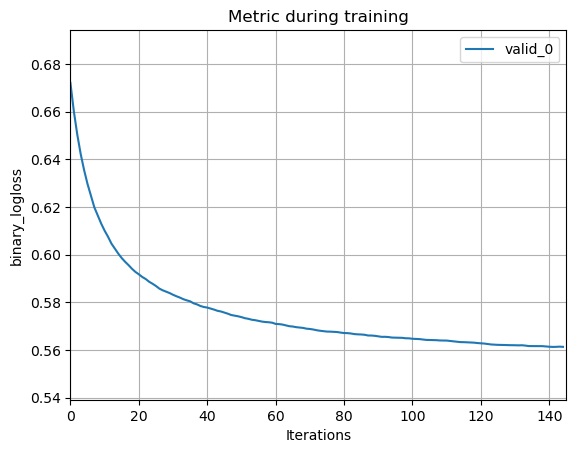

In [51]:
ax = lgb.plot_metric(evals_result, metric='binary_logloss')
plt.show()

We can see that values of the binary log loss obtained after each iteration of training the lightGBM. The values reach a plateau at higher iterations, suggesting that the learning converged at a minimum of the optimization function

#### 5. Evaluate the lightGBM model

In [52]:
from sklearn.metrics import roc_auc_score, accuracy_score

- Calculate the probability of default in train and test sets

In [53]:
pred_train = gbm.predict_proba(X_train_enc)[:, 1]
pred_eval = gbm.predict_proba(X_eval_enc)[:, 1]
pred_holdout = gbm.predict_proba(X_holdout_enc)[:, 1]


- Calculate the ROC-AUC values

In [54]:
roc_train = roc_auc_score(y_train, pred_train)
roc_eval = roc_auc_score(y_eval, pred_eval)
roc_holdout = roc_auc_score(y_holdout, pred_holdout)

print(f"Train set roc-auc: {roc_train}")
print(f"Eval set roc-auc: {roc_eval}")
print(f"Hold-out set roc-auc: {roc_holdout}")

Train set roc-auc: 0.8270170205422256
Eval set roc-auc: 0.7755181560539279
Hold-out set roc-auc: 0.7672742941078208


#### Lets Predict if the customers will default in train and test sets and see the result

In [55]:
pred_train = gbm.predict(X_train_enc)
pred_eval = gbm.predict(X_eval_enc)
pred_holdout = gbm.predict(X_holdout_enc)

##### Calculate the accuracy of the predictions:

In [56]:
acc_train = accuracy_score(y_train, pred_train)
acc_eval = accuracy_score(y_eval, pred_eval)
acc_holdout = accuracy_score(y_holdout, pred_holdout)

print(f"Train set accuracy: {acc_train}")
print(f"Eval set accuracy: {acc_eval}")
print(f"Hold-out set accuracy: {acc_holdout}")

Train set accuracy: 0.7498537321883552
Eval set accuracy: 0.7147260877223885
Hold-out set accuracy: 0.7033644530561917


### 6. Plot and evaluate the feature importance

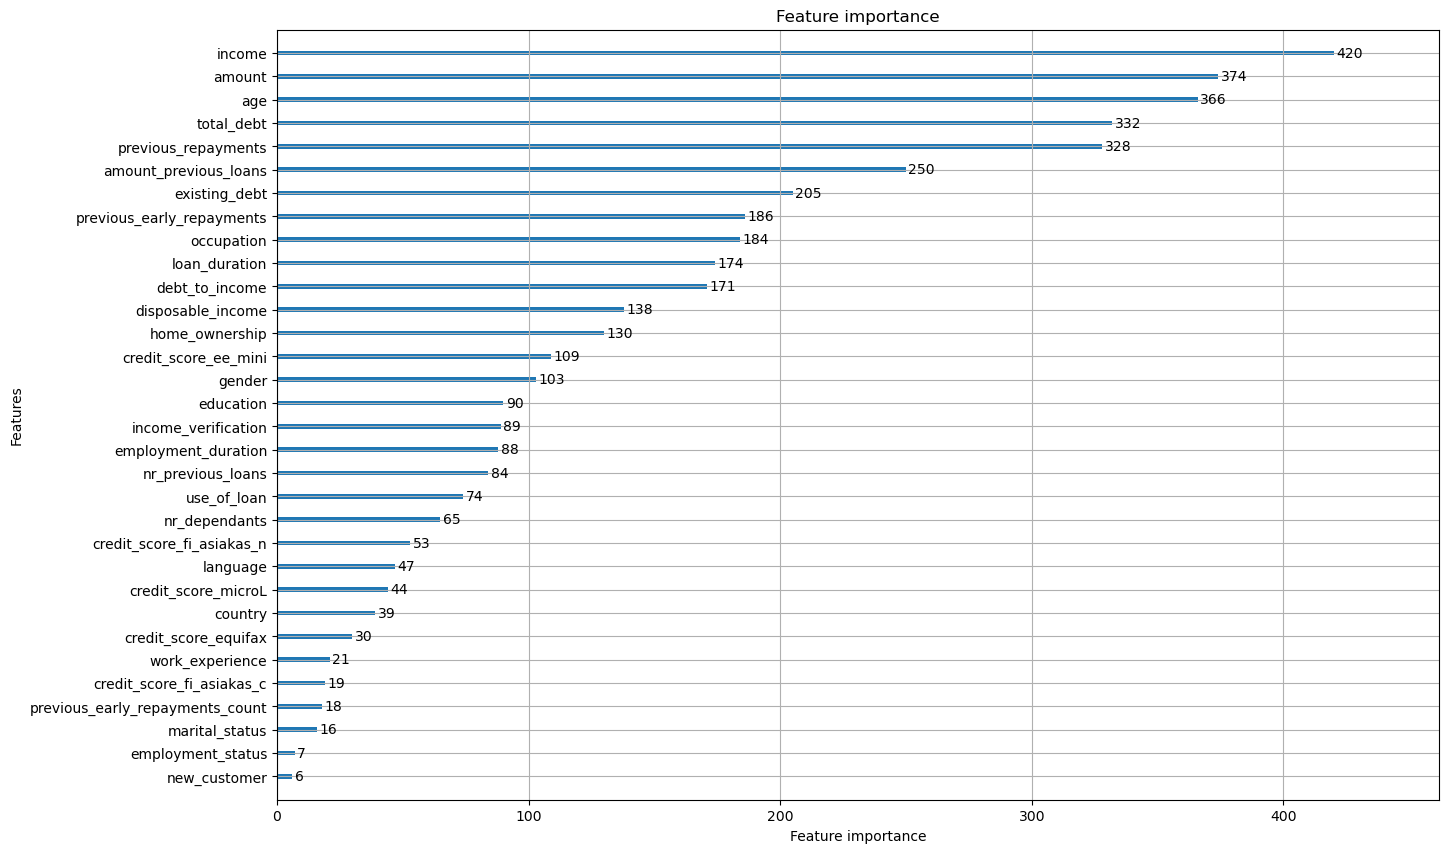

In [57]:
ax = lgb.plot_importance(gbm, figsize=(15, 10))
plt.show()

From the plot we can observe that, the amount of money requested by the customer, as well as their income and existing debt, their age, and whether they repaid previous loans, are important indicators of the customer's credit risk.

#### 7. Now we will try to Optimize the parameter of the lgbm if we can get better performing model

In [58]:
from scipy import stats
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [59]:
# setup the model
gbm = lgb.LGBMClassifier(
    num_iterations=1000,
    random_state=10,
)

Define the range of values for each hyperparameter that should be tested(parameter space)

In [60]:
param_grid = dict(
    n_estimators=stats.randint(10, 120),
    num_leaves=stats.randint(1, 100),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0.0001, 1),
)

#

Apply randomized search to optimize the ROC-AUC using 3-fold cross-validation

In [61]:
search = RandomizedSearchCV(
    gbm,
    param_grid,
    scoring='roc_auc',
    cv=3,
    n_iter=150,
    random_state=10,
    refit=True,
)

- To try and understand if you found the best hyperparameters or if there is room for improvement, plot the ROC-AUC values obtained for each hyperparameter combination evaluated during the search.

In [62]:
search.fit(
    X=X_train_enc,
    y=y_train,
    eval_set=[(X_eval_enc, y_eval)],
    categorical_feature=cols_cat,
    callbacks=[lgb.early_stopping(3)],
)

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[129]	valid_0's binary_logloss: 0.603065


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[149]	valid_0's binary_logloss: 0.601797


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[86]	valid_0's binary_logloss: 0.606259


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.577066


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.575577


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.576004


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.59059


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.597718


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.594793


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.593626


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.600193


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.593171


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 r

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.586657
[LightGBM] [Warning] Accuracy may be bad since you

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 r

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.591899


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.581864


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.592951


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.579048


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.583762


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.582765


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.583691


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[386]	valid_0's binary_logloss: 0.586271


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[47]	valid_0's binary_logloss: 0.587405


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[71]	valid_0's binary_logloss: 0.581565


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.590266


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.583519


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.588628


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.585769


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.587413


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[97]	valid_0's binary_logloss: 0.57842


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[183]	valid_0's binary_logloss: 0.572131


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[179]	valid_0's binary_logloss: 0.57214


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early sto

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.585445


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.591899


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.581864


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.592951


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.573674


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.575338


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.579441


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[266]	valid_0's binary_logloss: 0.60855


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[418]	valid_0's binary_logloss: 0.604294


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[324]	valid_0's binary_logloss: 0.60688


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.61082


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[154]	valid_0's binary_logloss: 0.602758


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[127]	valid_0's binary_logloss: 0.604293


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[921]	valid_0's binary_logloss: 0.607475


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.606277


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[889]	valid_0's binary_logloss: 0.607793


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.58667


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.588673


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.588556


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[110]	valid_0's binary_logloss: 0.566519


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[75]	valid_0's binary_logloss: 0.601968


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[62]	valid_0's binary_logloss: 0.603376


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[94]	valid_0's binary_logloss: 0.600825


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.582591


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.576941


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.575377


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.568051


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.576636
[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.571249


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.589088


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[66]	valid_0's binary_logloss: 0.583003


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.584417


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.587896


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[94]	valid_0's binary_logloss: 0.578062


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.586396


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[89]	valid_0's binary_logloss: 0.574765


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[96]	valid_0's binary_logloss: 0.574853


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[74]	valid_0's binary_logloss: 0.577742


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[67]	valid_0's binary_logloss: 0.60715
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [I

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[98]	valid_0's binary_logloss: 0.604246
[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[88]	valid_0's binary_logloss: 0.604531


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 r

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 r

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.587154


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[93]	valid_0's binary_logloss: 0.577563


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.592087


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.590645


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.587946


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.585951


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.583614


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.57947

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.180399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.585607


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.584456


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.092562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.583959


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.585951


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.583614


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.581275


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[84]	valid_0's binary_logloss: 0.582191


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[91]	valid_0's binary_logloss: 0.581384


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[159]	valid_0's binary_logloss: 0.575509


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[366]	valid_0's binary_logloss: 0.608873


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[553]	valid_0's binary_logloss: 0.604949


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[535]	valid_0's binary_logloss: 0.605712


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.593825


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.598952


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.595156


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.591018


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.581829


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.586402


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[337]	valid_0's binary_logloss: 0.569267


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[441]	valid_0's binary_logloss: 0.567041


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[76]	valid_0's binary_logloss: 0.579665


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.584423


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.588632


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[90]	valid_0's binary_logloss: 0.599212


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.601672


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[47]	valid_0's binary_logloss: 0.603932


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[192]	valid_0's binary_logloss: 0.608351


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[228]	valid_0's binary_logloss: 0.606291


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[205]	valid_0's binary_logloss: 0.607798


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 r

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 r

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 r

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[353]	valid_0's binary_logloss: 0.608704


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[447]	valid_0's binary_logloss: 0.606203


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[486]	valid_0's binary_logloss: 0.60607


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[364]	valid_0's binary_logloss: 0.608596


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[518]	valid_0's binary_logloss: 0.6051


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[462]	valid_0's binary_logloss: 0.606577


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.587159


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.587872


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.587058


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.590729


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.598334


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.593585


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[92]	valid_0's binary_logloss: 0.607842


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[217]	valid_0's binary_logloss: 0.601162


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[119]	valid_0's binary_logloss: 0.605505
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[102]	valid_0's binary_logloss: 0.608132


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[199]	valid_0's binary_logloss: 0.602546


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[163]	valid_0's binary_logloss: 0.604398


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[167]	valid_0's binary_logloss: 0.60355


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[106]	valid_0's binary_logloss: 0.606118


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[133]	valid_0's binary_logloss: 0.604737


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.593131


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.592768


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.595575


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.603626


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.605775


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.604347


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.590251

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.588209


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.589384


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.593109


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.591401


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[80]	valid_0's binary_logloss: 0.584491


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.590208
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[73]	valid_0's binary_logloss: 0.582221


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[79]	valid_0's binary_logloss: 0.581873


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[84]	valid_0's binary_logloss: 0.584628


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.58935


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.593027


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.596356


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.5702


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.605816


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.604621


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[88]	valid_0's binary_logloss: 0.6018
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.580783


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[218]	valid_0's binary_logloss: 0.606331


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[202]	valid_0's binary_logloss: 0.606479


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[261]	valid_0's binary_logloss: 0.604993


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[63]	valid_0's binary_logloss: 0.565433


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[64]	valid_0's binary_logloss: 0.567904


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[67]	valid_0's binary_logloss: 0.567877


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.587367


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.583861


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.586652


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.585431


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 r

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.584255
[LightGBM] [Warning] Accuracy may be bad since you

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 r

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.582446


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.581412


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.578541


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[86]	valid_0's binary_logloss: 0.600814


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.606433


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[71]	valid_0's binary_logloss: 0.602522


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.583767


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.586113


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.585212


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.579814


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.581018


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.579675


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.584005


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.579497
[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [I

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.57982


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.592155


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.589035


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.591503


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.579763
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.584034


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.583319


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.585319


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.592801


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.586765


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[458]	valid_0's binary_logloss: 0.593296


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[283]	valid_0's binary_logloss: 0.599618


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[406]	valid_0's binary_logloss: 0.594551


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.581033


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.581745


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.578986


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.592018


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.598158


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.59315


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.608683


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[99]	valid_0's binary_logloss: 0.604022


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.609253


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.579762


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.576938


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.579488


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.606963


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[148]	valid_0's binary_logloss: 0.598616


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[78]	valid_0's binary_logloss: 0.603717
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.590543


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.591892


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.585773


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of arg

[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[187]	valid_0's binary_logloss: 0.590326


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[292]	valid_0's binary_logloss: 0.582917


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[231]	valid_0's binary_logloss: 0.58712


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.585409


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.583132


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.582383


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iter

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.579064


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.579506


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.576753


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.583281


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.579312


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.580653


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.582308


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.584902


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.583841


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.59672


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[67]	valid_0's binary_logloss: 0.580693


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.58402


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[187]	valid_0's binary_logloss: 0.591712


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[209]	valid_0's binary_logloss: 0.588136


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[216]	valid_0's binary_logloss: 0.587836


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.567933


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.576012


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.572911


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.575526


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.576739


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.575513


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.590746


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[69]	valid_0's binary_logloss: 0.581555


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.585166
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.575199


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.576497


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.575687


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early sto

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.577143


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.579728


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.577396


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[66]	valid_0's binary_logloss: 0.586313


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[68]	valid_0's binary_logloss: 0.584971


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.592311


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[146]	valid_0's binary_logloss: 0.578203


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[156]	valid_0's binary_logloss: 0.57636


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[156]	valid_0's binary_logloss: 0.577511


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.584784


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.580801


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.589288


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.582183


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.579189


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.581106


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of arg

[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.597086


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.599538


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.599774


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.584944


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.586678


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.588054


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[67]	valid_0's binary_logloss: 0.592513


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[123]	valid_0's binary_logloss: 0.580168


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[89]	valid_0's binary_logloss: 0.586558


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.592105


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.58232


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.58903


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.59042


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[66]	valid_0's binary_logloss: 0.582569


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.588528
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.588832


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[170]	valid_0's binary_logloss: 0.570841


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[238]	valid_0's binary_logloss: 0.568823


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[196]	valid_0's binary_logloss: 0.571486


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[205]	valid_0's binary_logloss: 0.590549


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[248]	valid_0's binary_logloss: 0.586649


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[312]	valid_0's binary_logloss: 0.584805


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.590308


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.595393


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.594787
[LightGBM] [Info] Number of positive: 19691, number of negative: 15632


C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2214
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19691, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 35323, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557455 -> initscore=0.230842
[LightGBM] [Info] Start training from score 0.230842
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 19692, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 35324, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557468 -> initscore=0.230892
[LightGBM] [Info] Start training from score 0.230892
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 1187, in fit
    super().fit(
  File "C:\Users\gezahegne.wondachew\AppData\Local\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 885, in fit
 

[LightGBM] [Info] Number of positive: 29537, number of negative: 23448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2222
[LightGBM] [Info] Number of data points in the train set: 52985, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.557460 -> initscore=0.230859
[LightGBM] [Info] Start training from score 0.230859
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(num_iterations=1000,
                                            random_state=10),
                   n_iter=150,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DDED96E4A0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DDED907A30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DDED9079A0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DDED9078E0>},
                   random_state=10, scoring='roc_auc')

-  Check the best hyperparameter

In [63]:
search.best_params_

{'learning_rate': 0.06819727353795003,
 'max_depth': 8,
 'n_estimators': 18,
 'num_leaves': 86}

#### 8.Plot the results of the hyperparameter search

1. Capture the results of the search in a pandas dataframe:

In [64]:
results = pd.DataFrame(search.cv_results_)

2. Sort the dataframe according to the ROC-AUC values in ascending order

In [65]:
results.sort_values(by='mean_test_score', ascending=True, inplace=True)

3. Reset the index:

In [66]:
results.reset_index(drop=True, inplace=True)

4. Plot the ROC-AUC value returned by each hyperparameter combination:

Text(0.5, 0, 'Hyperparameter combinations')

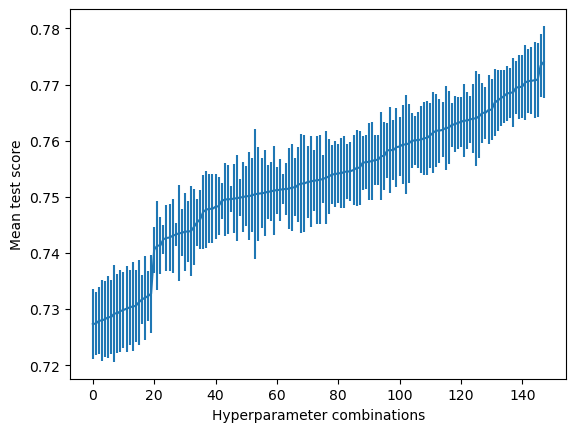

In [67]:
results['mean_test_score'].plot(
    yerr=[results['std_test_score'],
          results['std_test_score']],
    subplots=True)
 
plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

The values seem to reach a plateau at the top, which suggests that you have found an optimal set of hyperparameters for your lightGBM.

#### 9. Evaluat the new model

- Capture the data frame and explore it first:

In [68]:
results = pd.DataFrame(search.cv_results_)

- Sort the dataframe according to the ROC-AUC values in ascending order

In [69]:
results.sort_values(by='mean_test_score', ascending=True, inplace=True)

- Reset the index

In [70]:
results.reset_index(drop=True, inplace=True)

- plot ROC-AUC values

Text(0.5, 0, 'Hyperparameter combinations')

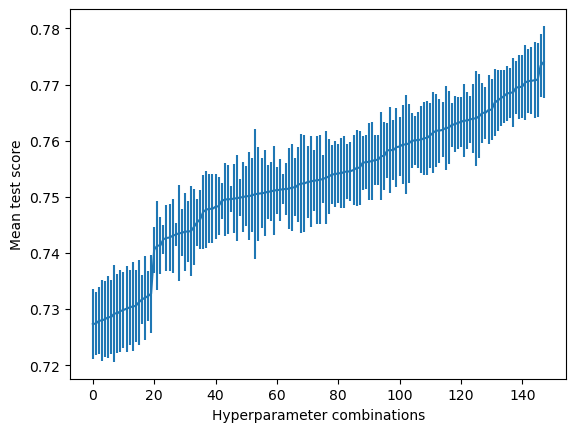

In [71]:
results['mean_test_score'].plot(
    yerr=[results['std_test_score'],
          results['std_test_score']],
    subplots=True)
 
plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

From the value we can see that the values seems to reach a plateau at the top, which suggests that you have found an optimal set of hyperparameters for your lightGBM.

#### 10.Compare the lightGBM performance to the existing linear model

In [72]:
import joblib

- Load the linear model

In [73]:
logit = joblib.load("model.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

- Calculate the probability of default in train and test sets:

In [ ]:
pred_train = search.predict_proba(X_train_enc)[:,1]
pred_eval = search.predict_proba(X_eval_enc)[:,1]
pred_holdout = search.predict_proba(X_holdout_enc)[:,1]

- Calculate the ROC-AUC:

In [ ]:
roc_train = roc_auc_score(y_train, pred_train)
roc_eval = roc_auc_score(y_eval, pred_eval)
roc_holdout = roc_auc_score(y_holdout, pred_holdout)

- Print out the  ROC-AUC values:

In [ ]:
print(f"Train set roc-auc: {roc_train}")
print(f"Eval set roc-auc: {roc_eval}")
print(f"Hold-out set roc-auc: {roc_holdout}")

- Predict if the customer will default in train and test sets:

In [ ]:
pred_train = search.predict(X_train_enc)
pred_eval = search.predict(X_eval_enc)
pred_holdout = search.predict(X_holdout_enc)

- Calculate the accuracy of the predictions:

In [ ]:
acc_train = accuracy_score(y_train, pred_train)
acc_eval = accuracy_score(y_eval, pred_eval)
acc_holdout = accuracy_score(y_holdout, pred_holdout)

- Print out the accuracy values:

In [ ]:
print(f"Train set accuracy: {acc_train}")
print(f"Eval set accuracy: {acc_eval}")
print(f"Hold-out set accuracy: {acc_holdout}")

- The lightGBM provides a substantial improvement in the assessment of default, compared to the linear model (see results from task 8). The ROC-AUC and the accuracy of the lightGBM are significantly higher than those of the linear model.

- Compare the ROC curves of the linear and lightGBM models. Start by importing the RocCurveDisplay function from scikit-learn:

In [ ]:
from sklearn.metrics import RocCurveDisplay

In [ ]:
logit_dist = RocCurveDisplay.from_predictions(
    y_holdout,
    logit.predict_proba(X_holdout)[:, 1],
    label="Logit",
)
 
gbm_dist = RocCurveDisplay.from_predictions(
    y_holdout,
    search.predict_proba(X_holdout_enc)[:, 1],
    ax=logit_dist.ax_,
    label="lgbm",
)
 
plt.show()

- In the following plot, you see that the lightGBM has a better performance than the linear model because the area under the ROC curve is larger:

#### 11. Determine the interest rate band customer allocation
Wow, well done. I am impressed with the performance of the new model. There is one thing though, our CEO and investors won't understand much about ROC values and accuracy. They are interested in whether we would be able to serve more customers and offer them better interest rates with the new model.

These are the current interest bands to which we allocate customers based on their probability of default:


A <= 0.1

B <= 0.2

C <= 0.3

D <= 0.4

E <= 0.5

F > 0.5

We currently reject loan applications from customers with a probability of default higher than 50% (bucket F). And we lend money to all other customers at different interest rates (buckets A-E). Customers in top buckets, that is, with smaller probability of default, get lower interest rates.

How does the customer bucket allocation compare between the lightGBM and the linear model? Could you please have a look and tell us what you find?

To compare the customer allocation between the lightGBM and the linear model, please use the hold-out data set. The hold-out data set is the one that you did not use to train the lightGBM or as a callback to evaluate performance during training.

- Put the probability of default returned by the lightGBM and the one returned by the linear model together in a dataframe:


In [ ]:

result = pd.concat([
    pd.Series(search.predict_proba(X_holdout_enc)[:, 1]),
    pd.Series(logit.predict_proba(X_holdout)[:, 1])
], axis=1)
 
result.columns = ['probs_lgbm', 'probs_logit']

- Display the first 5 rows of the resulting dataframe:

- In the following output, you see the probability of default returned by the lightGBM and linear model for the first 5 customers in the hold-out data set:

In [ ]:
result.head()

- Create a function to allocate customers to an interest band based on their probability of default:

In [ ]:
def rate(prob):
    if prob <=0.1:
        return "A"
    elif prob <= 0.2:
        return "B"
    elif prob <= 0.3:
        return "C"
    elif prob <= 0.4:
        return "D"
    elif prob <= 0.5:
        return "E"
    else:
        return "F"

- Now, allocate the customers to the different interest bands based on the probability of default returned by the lightGBM:

In [ ]:
result['rating_lgbm'] = result["probs_lgbm"].apply(rate)

- Next, allocate the customers to the different interest bands based on the probability of default returned by the linear model:

In [ ]:
result['rating_logit'] = result["probs_logit"].apply(rate)

- Display the first 5 rows of the resulting dataframe after the customer allocation into the interest bands:

In [ ]:
result.head()

- In the output of step 6, you see the probability of default returned by each model followed by the interest band into which each customer was allocated:

- To finish off, plot the number of customers in each interest band to compare the customer rating from the lightGBM and the linear model:

In [ ]:
# Determine proportion of observations per interest band
 
t1 = result["rating_logit"].value_counts(normalize=True)
t2 = result["rating_lgbm"].value_counts(normalize=True)
 
 
# concatenate proportions
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ["logit", "lgbm"]
tmp.sort_index(inplace=True)
 
# plot
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel("Number of customers per band")
plt.title("Customers per interest band")
plt.show()


From the plot, you can see that the lightGBM would have rejected loan applications from more customers, those allocated to bucket F, therefore preventing the company from losing money to those with a higher probability of default.



The lightGBM would have also allocated more customers, compared to the linear model, to buckets A and B, therefore allowing the company to offer better interest rates to "safer" customers.

12. Compare the potential profits returned by the lightGBM to those of the linear model

Compare the potential profits returned by the lightGBM to those of the linear model
Interesting. So with the lightGBM we would be able to allocate more customers to buckets A and B, therefore offering better interest rates, and also reject loan applications from riskier customers.

How does that translate into potential profits?

These are the interest rates that we offer in our different bands:



A, 10%

B, 20%

C, 30%

D, 40%

E, 50%

F, rejected

Let's assume that, for each loan that is repaid, we get a profit that equals the interest rate percent of the lent amount, and for each customer that defaults we get a loss equal to the lent amount.



In other words, if a customer borrows 1000 at 10% interest rate and repays the loan in full, our profit is 100. If a customer borrows 500 at an interest rate of 20% and defaults, our loss is 500.

- First, create a function that calculates the earnings based on the interest rate and the lent amount:

In [ ]:
def gain(variables):
    band, amount = variables
    if band == "A":
        return amount + amount*0.1
    elif band == "B":
        return amount + amount*0.2
    elif band == "C":
        return amount + amount*0.3
    elif band == "D":
        return amount + amount*0.4
    elif band == "E":
        return amount + amount*0.5
    else:
        return np.nan

- Now, add the loan amount to the data set with the customer bands (the one from task 10):

In [ ]:
result["amount"] = X_holdout["amount"].reset_index(drop=True)

- Next, add the default rate to the data set from step 3:

In [ ]:
result["default"] = y_holdout.reset_index(drop=True)

- Finally, calculate the earnings based on the customer ratings:

In [ ]:
result["gain_lgbm"] = result[["rating_lgbm", "amount"]].apply(gain, axis=1)
result["gain_logit"] = result[["rating_logit", "amount"]].apply(
    gain, axis=1)

- Display the resulting dataframe after steps 2 and 3:

In [ ]:
result.head(10)

- In the following dataframe, we see the probability of default, followed by the customer allocation into the interest bands, plus the amount of money that was lent to them, and finally, the gain based on the loan amount and the interest incurred based on the interest band:

- Add up the earnings based on the lightGBM customer allocation to the different interest bands, and also the loss incurred by lending money to customers that default, and display the result:

In [ ]:
tmp = result[result["rating_lgbm"] != "F"].groupby(
    ["rating_lgbm", "default"])[
    ["gain_lgbm", "amount"]].sum().unstack()
 
tmp

- The previous block code returns the following dataframe:

- To obtain the net earning, add up the earnings of customers who did not default across all interest bands, and subtract the loss incurred by lending money to those who did default:

In [ ]:
tmp = tmp["gain_lgbm"][0] - tmp["amount"][1]
tmp.sum()

- Finally, repeat steps 5 and 6 based on the linear model rating:

In [ ]:
tmp = result[result["rating_logit"] != "F"].groupby(
    ["rating_logit", "default"])[
    ["gain_logit", "amount"]].sum().unstack()
 
tmp = tmp["gain_logit"][0] - tmp["amount"][1]
 
tmp.sum()

- This means that for every 100 loan applications (the number of customers in the hold-out data set), the lightGBM would have returned USD 1050958 more profit than the currently linear model.